In [2]:
import os
import pandas as pd
import csv

In [3]:
def getCSVFileName(originPath):
    ''' get all file name under originPath '''
    f_list_csv = []
    f_list = os.listdir(originPath)
    # print f_list
    for i in f_list:
        # os.path.splitext():分离文件名与扩展名
        if os.path.splitext(i)[1] == '.csv':
            f_list_csv.append(os.path.splitext(i)[0])
    return f_list_csv

In [4]:
originPath = 'dataCleaned/'
print(" f_list_csv : ",getCSVFileName(originPath))
print(" len  f_list_csv : ",len(getCSVFileName(originPath)))

 f_list_csv :  ['20180530_prop_for_sale_tom_classifieds_Cleaned', '20151005_prop_for_sale_tom_classifieds_Cleaned', '20160125_prop_for_sale_tom_classifieds_Cleaned', '20200327_prop_for_sale_tom_classifieds_Cleaned', '20181024_prop_for_sale_tom_classifieds_Cleaned', '20180516_prop_for_sale_tom_classifieds_Cleaned', '20170911_prop_for_sale_tom_classifieds_Cleaned', '20180509_prop_for_sale_tom_classifieds_Cleaned', '20180222_prop_for_sale_tom_classifieds_Cleaned', '20191023_prop_for_sale_tom_classifieds_Cleaned', '20180326_prop_for_sale_tom_classifieds_Cleaned', '20191127_prop_for_sale_tom_classifieds_Cleaned', '20161227_prop_for_sale_tom_classifieds_Cleaned', '20180627_prop_for_sale_tom_classifieds_Cleaned', '20160611_prop_for_sale_tom_classifieds_Cleaned', '20180723_prop_for_sale_tom_classifieds_Cleaned', '20180919_prop_for_sale_tom_classifieds_Cleaned', '20180704_prop_for_sale_tom_classifieds_Cleaned', '20161108_prop_for_sale_tom_classifieds_Cleaned', '20171218_prop_for_sale_tom_classi

In [5]:
#create csv file named path
def create_csv(path):

    with open(path, 'w', newline='') as csvfile:
        head = ['Day_of_week', 'Month', 'Day_of_month', 'Year', 'Apartment', 'Maisonette', 'Garage','Pool','Garden', 'City','Price']
        writer = csv.DictWriter(csvfile, fieldnames=head)

        writer.writeheader()

In [6]:
def gen_all_data_CSV(originPath):
    files_csv = getCSVFileName(originPath)
    outPutnameCSVFile = 'allData.csv'
    create_csv(outPutnameCSVFile)
    
    #read the first CSV including the it's header
    #print("files_csv[0] : ", files_csv[0])
    dfFirstCSV = pd.read_csv(originPath+files_csv[0]+'.csv')
        
    #save the first CSV to destination csv
    dfFirstCSV.to_csv(outPutnameCSVFile, index = False)
        
    for i in range(1,len(files_csv)):
        df = pd.read_csv(originPath+files_csv[i]+'.csv')
        df.to_csv(outPutnameCSVFile,index=False, header=False, mode='a+')

        
        

In [7]:
gen_all_data_CSV(originPath)

In [8]:
from matplotlib import pyplot as plt
import time
from datetime import date
import csv
import pandas as pd
import numpy as np
import statistics
from pandas import Series, DataFrame
import datetime

In [9]:
df = pd.read_csv (r'allData.csv')

#We observe that we can not use the price and that we need to change ',' . We create a new columns 

df['PriceE'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df.head()

,Day_of_week,Month,Day_of_month,Year,Apartment,Maisonette,Garage,Pool,Garden,City,Price,PriceE
0,Wednesday,May,30,2018,y,n,n,n,n,ATTARD,"240,000",240000.0
1,Wednesday,May,30,2018,n,n,y,n,n,BIRKIRKARA,"295,000",295000.0
2,Wednesday,May,30,2018,n,n,y,n,n,GOZO,"385,000",385000.0
3,Wednesday,May,30,2018,n,n,n,n,n,GOZO,"175,000",175000.0
4,Wednesday,May,30,2018,y,n,y,n,n,LIJA,"285,000",285000.0


In [10]:
#example for ATTARD, we want to see all informations about 
df_sample = pd.DataFrame(df)
f_filter = df_sample['City']=='ATTARD'
print(df_sample[f_filter])

       Day_of_week  Month  Day_of_month  Year Apartment Maisonette Garage  \
0        Wednesday    May            30  2018         y          n      n   
20          Sunday    May            27  2018         n          n      n   
21          Sunday    May            27  2018         n          n      y   
22          Sunday    May            27  2018         n          n      y   
23          Sunday    May            27  2018         n          n      y   
...            ...    ...           ...   ...       ...        ...    ...   
109366      Sunday  April             9  2017         y          n      y   
109367      Sunday  April             9  2017         n          n      n   
109368      Sunday  April             9  2017         n          n      y   
109369      Sunday  April             9  2017         y          n      n   
109370      Sunday  April             9  2017         n          y      y   

       Pool Garden    City    Price    PriceE  
0         n      n  ATTARD 

In [11]:
#We can now have the mean of an habitation in Attard
print(df_sample[f_filter].PriceE.mean())

339789.33694866236


In [12]:
#We can now have the mean of an habitation in Malte in function if it is a maisonette, with...

f_filter1 = df_sample['Maisonette']=='y'
print("For a maisonette, there are",len(df_sample[f_filter1].PriceE) ,"choices")
print("and the mean price for a maisonette:  ", df_sample[f_filter1].PriceE.mean() , "€")
print('')
f_filter5 = (df_sample['Maisonette']=='y')&(df_sample['Pool']=='y')
print("For a maisonette with pool, there are",len(df_sample[f_filter5].PriceE) ,"choices")
print("and the mean price for a maisonette with pool:  ", df_sample[f_filter5].PriceE.mean() , "€")
print('')
f_filter6 = (df_sample['Maisonette']=='y')&(df_sample['Garage']=='y')
print("For a maisonette with garage, there are",len(df_sample[f_filter6].PriceE) ,"choices")
print("and the mean price for a apartement with a garage:  ", df_sample[f_filter6].PriceE.mean() , "€")
print('')
print('')
print('')





#We can now have the mean of an habitation in Malte in function if it is a apartment, with...



f_filter2 = df_sample['Apartment']=='y'
print("For an appartment, there are",len(df_sample[f_filter1].PriceE) ,"choices")
print("and the mean price for a apartement:  ", df_sample[f_filter2].PriceE.mean() , "€")
print('')
f_filter3 = (df_sample['Apartment']=='y')&(df_sample['Pool']=='y')
print("For an apartment with pool, there are",len(df_sample[f_filter3].PriceE) ,"choices")
print("and the mean price for a apartment with pool:  ", df_sample[f_filter3].PriceE.mean() , "€")
print('')
f_filter4 = (df_sample['Apartment']=='y')&(df_sample['Garage']=='y')
print("For an apartment with garage, there are",len(df_sample[f_filter4].PriceE) ,"choices")
print("and the mean price for a apartement with a garage:  ", df_sample[f_filter4].PriceE.mean() , "€")













For a maisonette, there are 15904 choices
and the mean price for a maisonette:   230176.10441372535 €

For a maisonette with pool, there are 472 choices
and the mean price for a maisonette with pool:   347186.8965517241 €

For a maisonette with garage, there are 4580 choices
and the mean price for a apartement with a garage:   276774.7940891473 €



For an appartment, there are 15904 choices
and the mean price for a apartement:   231102.39703989704 €

For an apartment with pool, there are 1043 choices
and the mean price for a apartment with pool:   300861.13109048724 €

For an apartment with garage, there are 7200 choices
and the mean price for a apartement with a garage:   281317.2567905089 €


In [26]:

#Number of habitation per year in ATTARD
YearsA = []

print("number of habitation offer in ATTARD per year")

YearsACount = []
for Year in ATTARD.Year:
    if Year not in YearsA:
        YearsA.append(Year)
        YearsACount.append(1)
    else:
        YearsACount[YearsA.index(Year)]+=1
plt.barh(range(len(YearsACount)), YearsACount,tick_label = YearsA)
plt.show()

print(YearsCount)


number of habitation offer in ATTARD per year


NameError: name 'ATTARD' is not defined

number of habitation offer in Malta per year


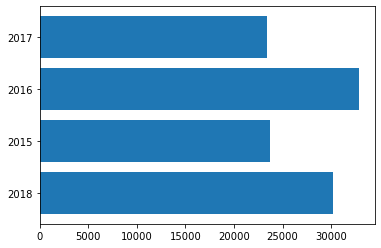

[30132, 23709, 32813, 23362]


In [14]:

#Number of habitation per year in ATTARD
Years = []

print("number of habitation offer in Malta per year")

YearsCount = []
for Year in df.Year:
    if Year not in Years:
        Years.append(Year)
        YearsCount.append(1)
    else:
        YearsCount[Years.index(Year)]+=1
plt.barh(range(len(YearsCount)), YearsCount,tick_label = Years)
plt.show()

print(YearsCount)



In [15]:
#per year, what is the average price of habitation in malta
groupby_mean = df.groupby(['City']).mean()
print(groupby_mean.PriceE)





City
                    280480.327869
 ANNE PULLICINO               NaN
 AREA                         NaN
 ATTARD             341166.666667
 BALZAN             305900.000000
                        ...      
ŻIRA                205000.000000
ŻIRA AREA                     NaN
ŻONQOR              294687.500000
ŻURRIEQ             244095.425801
ŻURRIEQ             110000.000000
Name: PriceE, Length: 544, dtype: float64


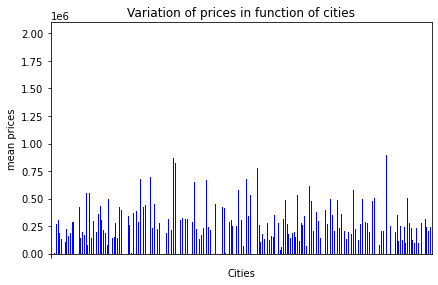

In [16]:
groups = df.groupby(["City"])["PriceE"].mean()
groups.plot.bar(color="blue")

plt.gca().get_xaxis()
plt.gca().xaxis
axes = plt.gca()
axes.xaxis.set_ticks(range(1))
plt.tight_layout()
axes.set_xlabel('Cities')
axes.set_ylabel('mean prices')
plt.title("Variation of prices in function of cities")
plt.show()




Text(0.5, 1.0, 'Variation of price with bars')

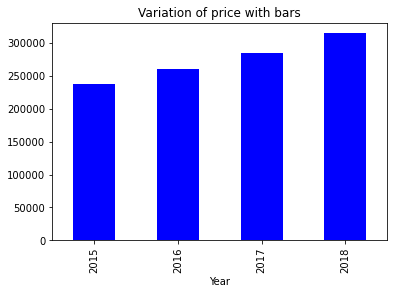

In [17]:
graph = df.groupby(["Year"])["PriceE"].mean()
graph.plot.bar(color="blue")
plt.title("Variation of price with bars")



In [18]:
#per year, what is the average price of habitation in malta
groupby_mean = df.groupby(['Year']).mean()
print(groupby_mean.PriceE)



Year
2015    237838.222983
2016    260175.606851
2017    284513.190645
2018    315118.013043
Name: PriceE, dtype: float64


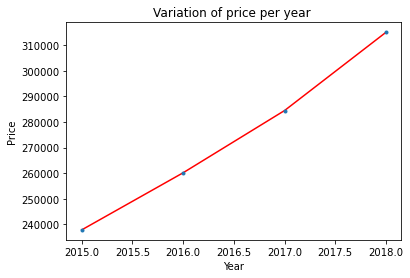

In [19]:
plt.title("Variation of price per year ")
graph = df.groupby(["Year"])["PriceE"].mean()
graph.plot(color="red")

#we verify that it is the same values
plt.plot([2015,2016,2017,2018], [237838.222983,260175.606851,284513.190645,315118.013043],'.')

plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

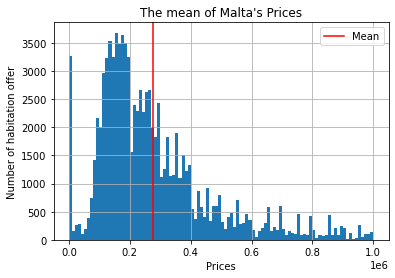

the expensive Malta's offer is  6790000.0 €
the mean Malta's offer is  275041.42628506274 €


In [24]:
# Plot distribution
hist = df['PriceE'].hist(range=(0,1000000), bins=100)
hist.plot()
plt.title("The mean of Malta's Prices")
plt.xlabel("Prices")
plt.ylabel("Number of habitation offer")

avg = df.PriceE.mean()
plt.axvline(x=avg, color='red')
plt.legend(["Mean"])
plt.show()

print("the expensive Malta's offer is ", df.PriceE.max() , "€")
print("the mean Malta's offer is " , df.PriceE.mean(), "€")